In [2]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie

In [4]:
cd("C:\\Users\\" *username *  "\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:];

In [5]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [6]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [7]:
index = 100
I0_hom[index], u0_hom[index]

(-1.7187941088810088, 0.2659355190210094)

In [8]:
I0 = I0_hom[index]; U0 = u0_hom[index];
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.516933929318748, 0.6578256737356879, 0.5888948000481755]

3-element Vector{Float64}:
 8.516933929318748
 0.6578256737356879
 0.5888948000481755

In [9]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.2659355190210094, 0.305, 0.3, -1.7187941088810088]
 time:          0.0
 state:         [8.516933929318748, 0.6578256737356879, 0.5888948000481755]


In [10]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [11]:
tr, trange = trajectory(ds, 1000, Δt = tstep)

(3-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

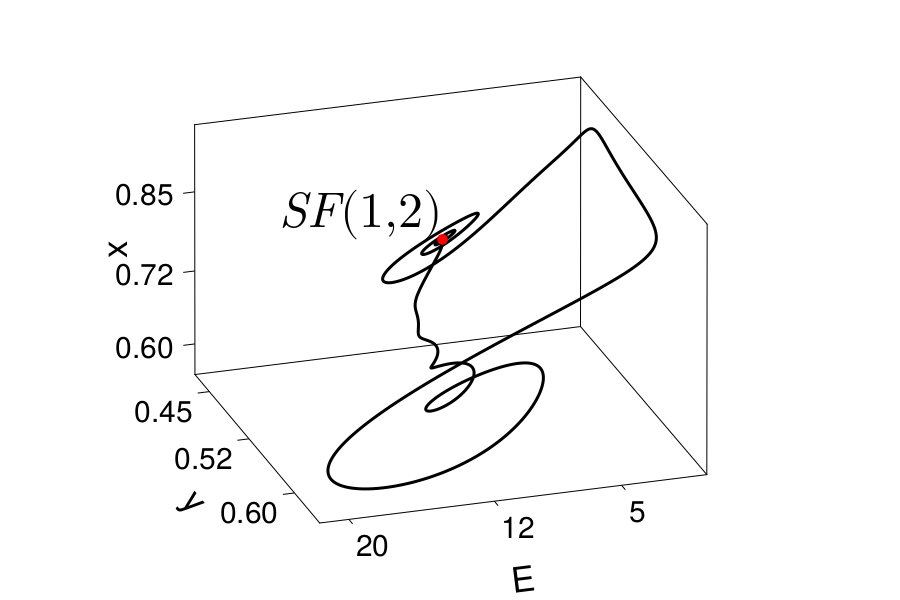

CairoMakie.Screen{IMAGE}


In [12]:
ts, tf = 100000, 110000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis, xticks = [5, 12, 20], yticks = [0.45, 0.52, 0.60], zticks = [0.6, 0.72, 0.85])


lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz], text = L"SF(1,2)", fontsize = 50, align = (:right, :baseline))
end

display(f)

In [13]:
save("C:\\Users\\Alex\\Desktop\\homoclinic_to_sf.eps", f)

CairoMakie.Screen{EPS}
